In [1]:
import babypandas as bpd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')

# DSC 10 - Final Exam Review

## The Final Exam

- Saturday, available in a 24 hour window.
- 3 hours to complete; designed to take less.
- Cumulative, with focus on Weeks 05 -- 10.
- Open book, open note, open everything (but no talking about the exam).

## The Final Project

- Don't forget: due next week.
- Excellent practice for the final exam.

## The Final Discussion

- The stuff from the second part of the quarter was more *conceptual*.
- The final exam will therefore have more *conceptual* questions.
- Here, we'll review the main concepts from second part of the quarter.

# Concept 1: Distributions

## Distributions

- A *ditribution* tells us the probability of each possible outcome.
- Often visualized with a *histogram*.

## Example

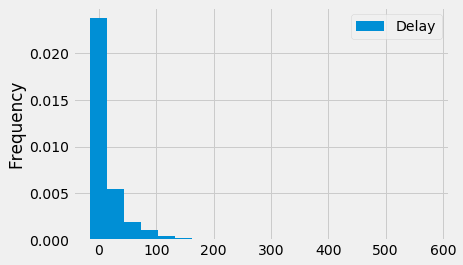

In [2]:
flights = bpd.read_csv('united_summer2015.csv')
flights.plot(kind='hist', y='Delay', bins=20, density=True)

# Concept 2: Sampling

## Populations and Samples

- The *population* is the "entire" data set. We don't usually see it.
- Instead, we see a *sample* whose size is smaller than the population.
- We usually obtain the sample *randomly*.

In [3]:
population = flights

## With/Without Replacement

- We have the option to randomly sample with/without replacement.

In [4]:
population.sample(2000, replace=True)

,Date,Flight Number,Destination,Delay
4759,7/2/15,1579,LAX,-1
4019,6/27/15,1684,LIH,-7
7632,7/21/15,1993,IAD,-2
10686,8/10/15,1683,EWR,7
6979,7/17/15,1415,PDX,-8
...,...,...,...,...
1616,6/11/15,1635,DEN,-3
5434,7/7/15,1523,SEA,58
1987,6/14/15,637,JFK,2
1536,6/11/15,502,JFK,-8


## Examples

In each of the following experiments, 1) what is the population? 2) should we sample with or without replacement?

- Picking a team of 5 from a class of 100 people.
- Rolling a 6-sided die, 20 times.
- Randomly generating names for 100 babies born.

# Concept 3: Estimation

- We want to know some aspect (parameter) of the *population*.
    - Example: the average flight delay, or total number of planes produced
- We don't have the population, only a sample.
- So we try to *estimate* the parameter using the sample.

## Statistics

- A statistic is any number computed from a sample.
- We compute a *statistic* to *estimate* a population *parameter*.
- Example: sample mean flight delay.

## The Problem

- You randomly select a sample and compute your statistic.
    - Example: the sample mean flight delay is 14 minutes.
- Your hope: it is close to the "right answer" (the pop. mean).
- You can never know *exactly* how close it is without having the population.
- The power of statistics: you can say how *likely* it is to be within a certain distance.

## Sampling Distribution

- The sample is random; so your sample statistic is, too.
- I.e., it could have been different.
- The *sampling distribution* tells us the probability of those different outcomes.
- I.e., it tells us how different sample mean *could have been*.

In [5]:
observed_mean = population.sample(2000).get('Delay').mean()
observed_mean

16.078

## Simulating the Sampling Distribution

- Let's get more samples from the population, compute mean of each.
- **Problem**: In the real world we (usually) can't do this.

In [6]:
sample_means = np.array([])
for i in np.arange(1000):
    mean = population.get('Delay').sample(2000).mean()
    sample_means = np.append(sample_means, mean)

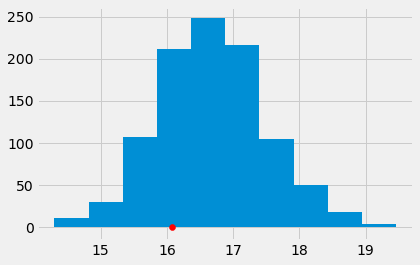

In [7]:
plt.hist(sample_means)
plt.scatter(observed_mean, 0, color='red', zorder=10)

## Sampling Distribution

- We'd love to know the sampling distribution.
- But we just have one sample.
- How do we approximate the sampling distribution with just one sample?
- Answers: the Bootstrap and the Central Limit Theorem

# Concept 4: The Bootstrap

## The Boostrap

- Problem: we want to know the sample distribution of our statistic, but we just have one sample.

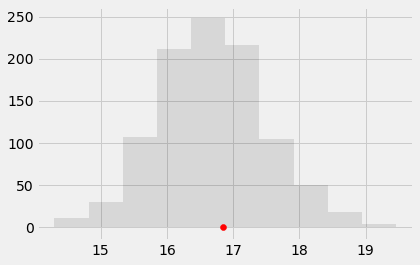

In [8]:
original_sample = population.sample(2000)
plt.hist(sample_means, alpha=.1, color='black')
plt.scatter(original_sample.get('Delay').mean(), 0, color='red', zorder=10)

## Idea

- I wish I had the population; then I could get more samples:

In [9]:
another_sample = population.sample(2000)

- I don't have the population.
- But hey, the original sample probably looks like the population. Let's sample from it.

In [10]:
bootstrap_sample = original_sample.sample(2000, replace=True)

## Boostrapping and Replacement

- **Important**: when we get a boostrap sample, we sample *with* replacement. Why?
- If we didn't we'd just get the same data set back:

In [11]:
original_sample.sample(2000, replace=False).get('Delay').mean()

16.842

## Bootstrapping and Duplicates

- If we sample with replacement, we'll get duplicates.
- This is OK! In fact, it is necessary.
- The mean doesn't care about duplicates.
    - mean of [1.9, 2.1, 6.1, 6.2] is $\approx$ mean of [2, 2, 6, 6]

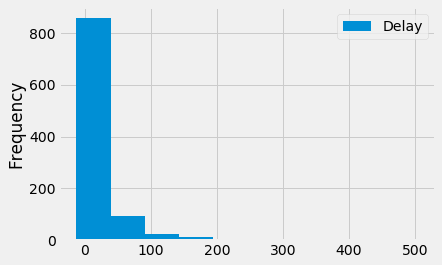

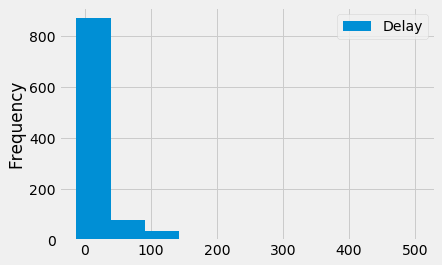

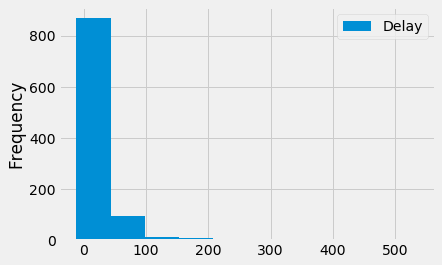

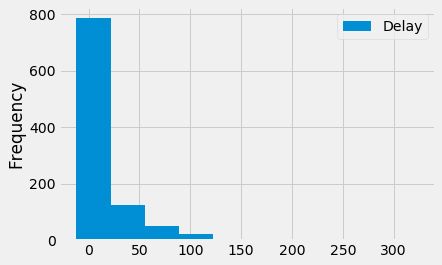

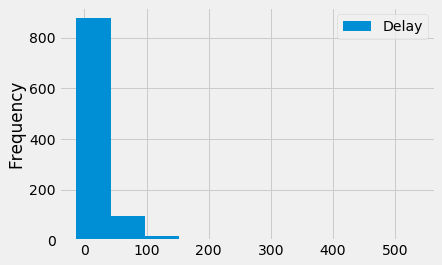

In [12]:
for i in range(5):
    original_sample.sample(1000, replace=True).plot(kind='hist', y='Delay')

## Example

In [13]:
bootstrap_sample_means = np.array([])
for i in np.arange(5000):
    bootstrap_sample_mean = original_sample.get('Delay').sample(original_sample.shape[0], replace=True).mean()
    bootstrap_sample_means = np.append(bootstrap_sample_means, bootstrap_sample_mean)

(array([0.0193836 , 0.0581508 , 0.20740454, 0.41093235, 0.48265168,
        0.41868579, 0.20352782, 0.09691801, 0.03489048, 0.00581508]),
 array([14.302 , 14.8179, 15.3338, 15.8497, 16.3656, 16.8815, 17.3974,
        17.9133, 18.4292, 18.9451, 19.461 ]),
 <a list of 10 Patch objects>)

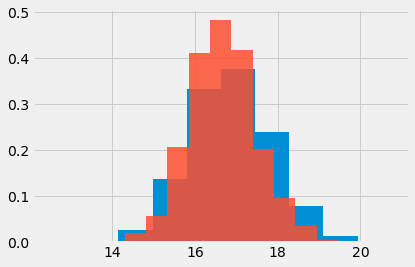

In [14]:
plt.hist(bootstrap_sample_means, density=True)
plt.hist(sample_means, density=True, alpha=.85)

# Concept 5: The Central Limit Theorem

## The CLT

- Problem: we want to know the sample distribution of our statistic, but we just have one sample.

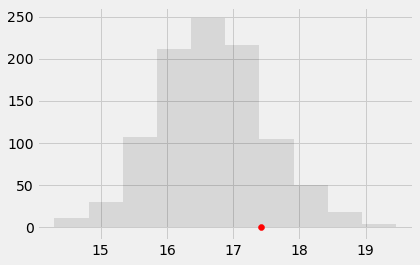

In [15]:
original_sample = population.sample(2000)
plt.hist(sample_means, alpha=.1, color='black')
plt.scatter(original_sample.get('Delay').mean(), 0, color='red', zorder=10)

## Idea

- Some smart people proved that the distribution of the *sample mean* will be (approximately) normal.
- This is the **Central Limit Theorem**:

> The sampling distribution of the sample mean is approximately a normal curve, centered at the population mean, and with standard deviation equal to the population standard deviation over the square root of the sample size.

## CLT

- The CLT let's us approximate the sample distribution of the mean without getting more samples or running the bootstrap.
- Small problem: we don't have the sample mean/SD. That's OK, just use the sample mean/SD.

## Careful!

- There are lots of distributions here. The population distribution, the sample distribution, and the distribution of the sample mean, each with their own mean / SD.

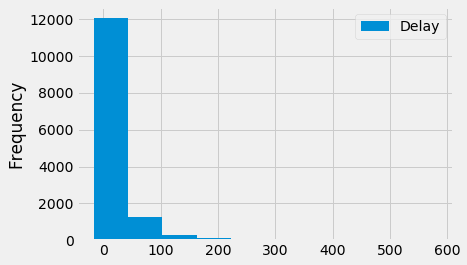

In [16]:
population.plot(kind='hist', y='Delay')

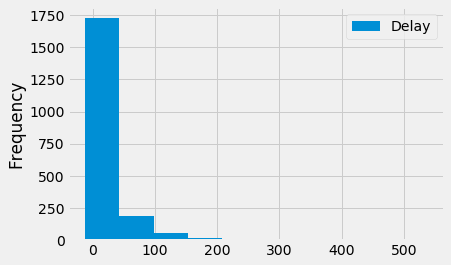

In [17]:
original_sample.plot(kind='hist', y='Delay')

(array([ 10.,  30., 107., 212., 249., 216., 105.,  50.,  18.,   3.]),
 array([14.302 , 14.8179, 15.3338, 15.8497, 16.3656, 16.8815, 17.3974,
        17.9133, 18.4292, 18.9451, 19.461 ]),
 <a list of 10 Patch objects>)

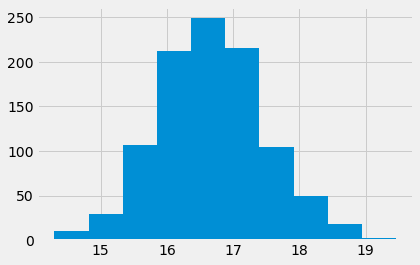

In [18]:
plt.hist(sample_means)

## Example

In [19]:
def norm(x, mu, sigma):
    return 1/np.sqrt(2 * np.pi * sigma**2) * np.exp(-0.5 * (x - mu)**2 / sigma**2)

In [20]:
mu = original_sample.get('Delay').mean()
sigma = np.std(original_sample.get('Delay')) / np.sqrt(2000)

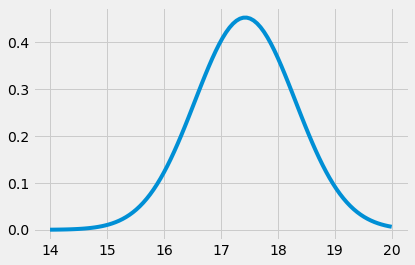

In [21]:
x_clt = np.linspace(14, 20, 100)
y_clt = norm(x_clt, mu, sigma)
plt.plot(x_clt, y_clt)

## CLT vs Boostrapping

- The CLT and Boostrapping are two ways of approximating a sampling distribution.
    - How different could our estimate have been?
- However, the CLT is **only** useful when talking about the sample mean (or sample sum).
- The boostrap is more generally useful. Example: the sample median.

## When to use the CLT vs the Boostrap

- If we're talking about the sample mean, use the CLT.
- *Could* use the boostrap, but it's less accurate/slower.
- If we're talking about another statistic (e.g., median), use the bootstrap.

# Concept 6: Confidence Intervals

## Confidence Intervals

- How different could our estimate have been?
- Instead of giving a single estimate, give an interval and a "confidence level".
- E.g., "I'm 95% sure that the population mean flight delay is between 14 and 17".

## CIs and the Sampling Distribution

- If we have a sampling distribution, we can construct a CI (no matter how we got the sampling distribution).

(array([0.00048429, 0.00121073, 0.02590956, 0.13778074, 0.33319208,
        0.37726255, 0.24069254, 0.0789394 , 0.01380229, 0.00145287]),
 array([12.4975 , 13.32345, 14.1494 , 14.97535, 15.8013 , 16.62725,
        17.4532 , 18.27915, 19.1051 , 19.93105, 20.757  ]),
 <a list of 10 Patch objects>)

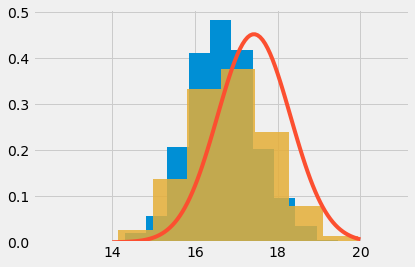

In [22]:
plt.hist(sample_means, density=True)
plt.plot(x_clt, y_clt)
plt.hist(bootstrap_sample_means, density=True, alpha=0.85)

## Constructing CIs

- An $x$% CI contains the middle $x$% of the sampling distribution.
- Two ways:
    1. If we have a bunch of sample statistics (like from the boostrap), we can use `np.percentile`.
    2. If we're using the CLT, we can use the rule of thumb: 95% of normal curve is within 2 SDs of mean.

## Example: From the Actual Sampling Distribution

In [23]:
[left_sms, right_sms] = np.percentile(sample_means, 2.5), np.percentile(sample_means, 97.5)
[left_sms, right_sms]

[15.1284375, 18.3052125]

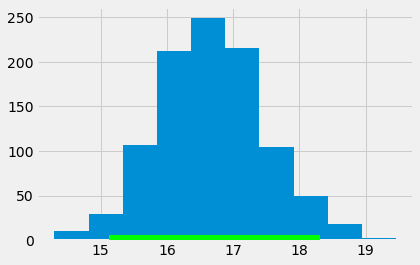

In [24]:
plt.hist(sample_means)
plt.plot([left_sms, right_sms], [0,0], color='lime', linewidth=10, zorder=10)

## Example: From the Boostrap Sampling Distribution

In [25]:
[left_boot, right_boot] = np.percentile(bootstrap_sample_means, 2.5), np.percentile(bootstrap_sample_means, 97.5)
[left_boot, right_boot]

[15.0059875, 18.787637500000002]

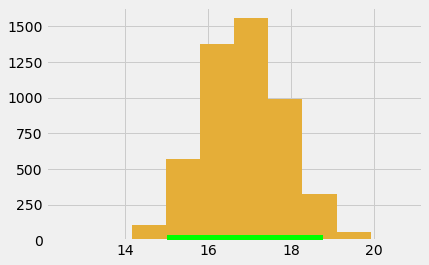

In [26]:
plt.hist(bootstrap_sample_means, color='C2')
plt.plot([left_boot, right_boot], [0,0], color='lime', linewidth=10, zorder=10)

## Example: From the CLT

In [27]:
import scipy.stats

In [31]:
[left_clt, right_clt] = [
    original_sample.get('Delay').mean() - 2 * np.std(original_sample.get('Delay')) / np.sqrt(2000),
    original_sample.get('Delay').mean() + 2 * np.std(original_sample.get('Delay')) / np.sqrt(2000),
]

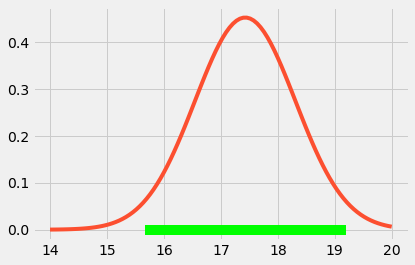

In [35]:
plt.plot(x_clt, y_clt, color='C1')
plt.plot([left_clt, right_clt], [0,0], color='lime', linewidth=10, zorder=10)

## Comparison

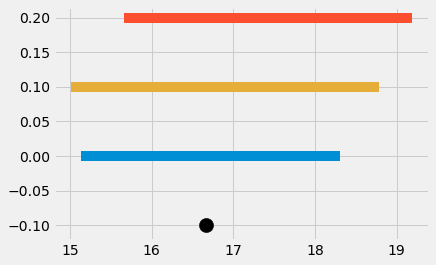

In [45]:
plt.plot([left_clt, right_clt], [.2, .2], color='C1', linewidth=10, zorder=10)
plt.plot([left_boot, right_boot], [.1,.1], color='C2', linewidth=10, zorder=10)
plt.plot([left_sms, right_sms], [0,0], color='C0', linewidth=10, zorder=10)
plt.scatter(population.get('Delay').mean(), -.1, color='black', s=200)

# Accuracy

- The Boostrap and CLT are *approximations*.
- As the sample size increases, they get better.

# Concept 7: Hypothesis Testing

## Assessing Models

- We have a *model* of reality (a set of assumptions)
    - Example: jury panels are selected at random from eligible population
- Is the model plausible or unlikely?
- We can use probability and simulation to assess its likelihood.

## Null and Alternative Hypotheses

- The *null* hypothesis is the "default", "boring" model of reality.
- The *alternative* hypothesis is the interesting one.
- The null hypothesis is (usually) precise and specific enough that it allows us to simulate.

## Example

I think a coin is unfair. To test it, I make the following hypotheses:

- Null: the coin is fair
- Alternative: the coin is not fair

## Example

I think a coin is *biased towards heads*. I make the following hypotheses:
    
- Null: the coin is fair
- Alternative: the coin is unfair and biased towards heads

## Workflow

- Is the null hypothesis false?
- Flip the coin a bunch, count *observed* numbers of heads.
- Is what we observed consistent with the null model, or very unlikely?
- We need probability of seeing observed under the null hypothesis.

## Test Statistics

- We must have a way of measuring how far we are from what is expected under the null.
- We need to choose a *test statistic*.
- The larger the test statistic, the more extreme.
- Choice depends on the *alternative* hypothesis.

## Example

- Alternative: the coin is not fair
- Possible test statistics:
    - the absolute difference between proportion of heads and 50%
    - the absolute difference between number of heads and 50
    - the TVD between sample distribution of heads/tails and the uniform distribution
    - ...

## Example

- Alternative: the coin is not fair, and *biased towards heads*.
- The statistic should be larger the more extreme the outcome.
- Possible test statistics:
    - the number of heads
    - the signed difference between the number of heads and 50
    - the signed difference between the proportion of heads and 50%

## Example

- You flip a coin 100 times and see 57 heads.
- Test alternative hypothesis: coin is biased towards heads.
- I.e., what is the probability of seeing 57 heads if coin is indeed fair?
- This is the *p-value*.

In [61]:
counts = np.array([])
for i in np.arange(1000):
    # flip fair coin 100 times
    flips = np.random.choice(['H', 'T'], 100)
    
    count = np.count_nonzero(flips == 'H')
    counts = np.append(counts, count)

In [62]:
counts

array([52., 49., 54., 49., 50., 53., 56., 57., 48., 43., 58., 51., 50.,
       58., 52., 53., 52., 49., 46., 49., 61., 42., 63., 56., 40., 46.,
       47., 52., 52., 56., 51., 48., 44., 57., 47., 48., 51., 44., 52.,
       52., 50., 50., 41., 49., 48., 41., 50., 55., 52., 57., 55., 55.,
       47., 55., 50., 57., 40., 47., 52., 43., 50., 48., 56., 45., 48.,
       55., 51., 54., 45., 54., 54., 36., 44., 41., 60., 41., 48., 47.,
       57., 52., 54., 55., 41., 47., 57., 54., 55., 54., 45., 56., 53.,
       54., 53., 51., 43., 51., 54., 47., 53., 49., 43., 59., 51., 53.,
       44., 50., 54., 41., 43., 49., 44., 53., 50., 52., 47., 43., 51.,
       55., 55., 60., 44., 49., 54., 46., 54., 48., 46., 47., 50., 49.,
       51., 49., 46., 47., 45., 41., 50., 45., 46., 54., 46., 48., 50.,
       54., 45., 43., 57., 47., 51., 50., 50., 52., 47., 54., 54., 53.,
       52., 52., 42., 50., 49., 56., 58., 54., 54., 48., 56., 49., 52.,
       48., 60., 43., 43., 48., 45., 48., 51., 54., 48., 47., 52

In [63]:
np.count_nonzero(counts >= 57) / 1000

0.112

## Rejecting and Failing to Reject

- The p-value tells us the probability of seeing the observed outcome if the null is true.
- If we had set a "confidence threshold" before the experiment, we can reject at that confidence level.
- E.g., if we had set a 5% threshold (95% confidence) we would fail to reject.
- Still, a p-value of $\approx$ 10% means that we were getting close to rejecting.

## Accepting a null hypothesis?

- We never "accept" a null hypothesis, we only "fail to reject". Why?
- If we see 50 heads and 50 tails, this isn't evidence that the coin is fair; only that it is close to fair.
- It would be wrong to say that we are "95% sure that the coin is fair".

# Concept 8: A/B Testing

## A/B Testing

- A type of hypothesis test.
- We have two groups. Do they come from the same distribution?
- Example: baby weights for mothers who smoked / didn't smoke.

## Idea

- The null hypothesis: they come from the same distribution.
- We can't directly simulate using the null.
- Permuting group labels is like sampling more data.

## Permutation Tests

- Given a table, one column with group labels, another with quantity of interest.
- Repeatedly:
    - Shuffle the group labels.
    - Compute a test statistic measuring difference between groups.
- Plot the distribution of differences, use to calculate p-value.